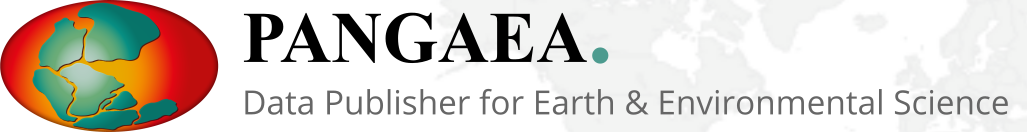

# **How to retrieve data from PANGAEA**

Version: 0.0.2<br>
By: Michael Oellermann, Kathrin Riemann-Campe<br>
Last updated: 2023-03-14

This notebook will guide you how to retrieve diverse earth- and environmental data and its metadata from the [PANGAEA data repository](https://www.pangaea.de) using Python. It uses the [PangaeaPy package](https://github.com/pangaea-data-publisher/pangaeapy), to facilitate the data download.

Run this notebook in:
* [GoogleColab](https://colab.research.google.com/github/pangaea-data-publisher/community-workshop-material/blob/master/Python/Get_pangaea_data/get_pangaea_data.ipynb): <a target="_blank" href="https://colab.research.google.com/github/pangaea-data-publisher/community-workshop-material/blob/master/Python/Get_pangaea_data/get_pangaea_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
* MyBinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/pangaea-data-publisher/community-workshop-material/HEAD)

# 1. Import libraries

In [1168]:
import os
import pandas as pd
import openpyxl

# Plotting
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# Pangaeapy
# !pip install pangaeapy # Uncomment to install pangaeapy
import pangaeapy as pan
from pangaeapy.pandataset import PanDataSet

# Web scraping
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve
import json
from pandas import json_normalize

# To access genebank records
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "your_email@example.com"

# 2. Search for data in PANGAEA

AIM: What data can I find for a particular topic such as a species, location or author?

This mirrors the search via the [PANGAEA website](https://pangaea.de/)

## 2.1 Simple search
Note:
* limit = the total number of datasets to be returned from search is 500.
    * To download > 500 use the offset attribute e.g. pan.PanQuery("Triticum", limit = 500, offset=500) 

In [1169]:
# Search database for Helgoland Roads
search = pan.PanQuery("Triticum")
print(f'There have been {search.totalcount} search results')
# Save search as dataframe
search_results = pd.DataFrame(search.result)
search_results.head(4)

There have been 587 search results


,URI,score,html,type,position
0,doi:10.1594/PANGAEA.896784,20.713749,"<li><div class=""citation""><a href=""https://doi...",parent,0
1,doi:10.1594/PANGAEA.886727,18.497100,"<li><div class=""citation""><a href=""https://doi...",child,1
2,doi:10.1594/PANGAEA.886725,18.163677,"<li><div class=""citation""><a href=""https://doi...",child,2
3,doi:10.1594/PANGAEA.925261,17.616169,"<li><div class=""citation""><a href=""https://doi...",parent,3


## 2.2 More complex searches

[More information](https://wiki.pangaea.de/wiki/PANGAEA_search) how to search with keywords


Multiple search terms

In [1170]:
# Finds datasets that contain both "marine" and "geology"
search = pan.PanQuery("marine geology")
print(f'There have been {search.totalcount} search results')

There have been 45036 search results


Optional search terms

In [1171]:
# Find datasets that contain "Globigerina" and either "falconensis" or "bulloides" 
search = pan.PanQuery("Globigerina AND (falconensis OR bulloides)")
print(f'There have been {search.totalcount} search results')

There have been 6392 search results


Uncertain spelling

In [1172]:
# Finds datasets with "Neogloboquadrina" regardless of your spelling mistake
search = pan.PanQuery("~Neogloboqadrina")
print(f'There have been {search.totalcount} search results') 

There have been 4935 search results


Specific author

In [1173]:
#  	Finds datasets of author "Herzschuh"
search = pan.PanQuery("author:Herzschuh")
print(f'There have been {search.totalcount} search results') 

There have been 500 search results


Within geolocation

In [1174]:
# Search database for "Deep-sea Sponge Microbiome Project" within a certain geolocation
search = pan.PanQuery("Deep-sea Sponge Microbiome Project", limit = 500, bbox=(17.7, 67.7, 21, 69))
print(f'There have been {search.totalcount} search results')

There have been 2 search results


# 3. Download datasets

## 3.1 Download single dataset

AIM: How can I download a single dataset right into Python or onto my harddrive?

### Seach for datasets

In [1175]:
search = pan.PanQuery("Deep-sea Sponge Microbiome Project")
print(f'There have been {search.totalcount} search results')
# Save search as dataframe
search_results = pd.DataFrame(search.result)
search_results[search_results["type"] == "child"]

There have been 8 search results


,URI,score,html,type,position
0,doi:10.1594/PANGAEA.923035,217.844880,"<li><div class=""citation""><a href=""https://doi...",child,0
1,doi:10.1594/PANGAEA.923033,211.280820,"<li><div class=""citation""><a href=""https://doi...",child,1
2,doi:10.1594/PANGAEA.923271,54.228783,"<li><div class=""citation""><a href=""https://doi...",child,2
3,doi:10.1594/PANGAEA.909246,51.014380,"<li><div class=""citation""><a href=""https://doi...",child,3
4,doi:10.1594/PANGAEA.913907,43.488290,"<li><div class=""citation""><a href=""https://doi...",child,4
5,doi:10.1594/PANGAEA.917599,41.262250,"<li><div class=""citation""><a href=""https://doi...",child,5
6,doi:10.1594/PANGAEA.951264,9.496083,"<li><div class=""citation""><a href=""https://doi...",child,6
7,doi:10.1594/PANGAEA.951266,9.370526,"<li><div class=""citation""><a href=""https://doi...",child,7


### Download dataset
Dataset: https://doi.pangaea.de/10.1594/PANGAEA.923033

In [1176]:
# Download dataset from PANGAEA
ds = PanDataSet(923033)
ds.data.head(3)

,Event,ID,Project,Access no gen,Access no gen_2,Campaign,Date/Time,Latitude,Longitude,Depth water,...,Samp type,Samp type_2,URL ref,Phylum,Class,Order,Family,Genus,Species,Elevation
0,HUD16/19_010,WB-00001,PRJNA613976,insdc:SRR11365522,NaN,Hudson2016-019,2016-07-20 16:30:12,44.3193,-62.605,199,...,sponge,LMA_glass,https://www.marinespecies.org/aphia.php?p=taxd...,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Vazella,Vazella pourtalesii,-200.8
1,HUD16/19_010,WB-00005,PRJNA613976,insdc:SRR11365520,NaN,Hudson2016-019,2016-07-20 16:30:12,44.3193,-62.605,199,...,sponge,LMA_glass,https://www.marinespecies.org/aphia.php?p=taxd...,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Vazella,Vazella pourtalesii,-200.8
2,HUD16/19_010,WB-00007,PRJNA613976,insdc:SRR11365519,NaN,Hudson2016-019,2016-07-20 16:30:12,44.3193,-62.605,199,...,sponge,LMA_glass,https://www.marinespecies.org/aphia.php?p=taxd...,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Vazella,Vazella pourtalesii,-200.8


### Translate to long parameter names
Because by default parameters are abbreviated without units

In [1177]:
# Translate short parameters names to long names including unit
def get_long_parameters(ds):
    """Translate short parameters names to long names including unit

    Args:
        ds (PANGAEA dataset): PANGAEA dataset
    """
    ds.data.columns =  [f'{param.name} [{param.unit}]' if param.unit else param.name for param in ds.params.values()]

get_long_parameters(ds)
ds.data.columns[:10]

Index(['Event label', 'Identification', 'Project',
       'Accession number, genetics', 'Accession number, genetics', 'Campaign',
       'DATE/TIME', 'LATITUDE', 'LONGITUDE', 'DEPTH, water [m]'],
      dtype='object')

### Display location of dataset samples

In [1178]:
# Plot sampling points on interactive plotly map
fig = px.scatter_mapbox(ds.data, lat="LATITUDE", lon="LONGITUDE", 
                        hover_name="Event label", 
                        hover_data=['LATITUDE', 'LONGITUDE', 'DEPTH, water [m]', 'Species', 'Gear'], 
                        zoom=0, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Save data

In [1179]:
# Create data folder
data_folder = "pangaea_data"
if not os.path.isdir(data_folder):
    os.mkdir(data_folder)
# Save to csv
print(f'PANGAEA dataset {ds.id} saved')
ds.data.to_csv(os.path.join(data_folder, f'Pangaea_dataset_{ds.id}.csv'))

PANGAEA dataset 923033 saved


# 3.2 Download multiple datasets

AIM: How can I download multiple datasets right into Python or on my harddrive?

### Search for datasets

Note:
* type: child = data set as part of a data collection, parent = data collection
* score: Indicates how well the dataset matched the query term

In [1180]:
# Search database for "Deep-sea Sponge Microbiome Project"
search = pan.PanQuery("Deep-sea Sponge Microbiome Project")
print(f'There have been {search.totalcount} search results')
# Save search as dataframe
search_results = pd.DataFrame(search.result)
search_results.head(2)

There have been 8 search results


,URI,score,html,type,position
0,doi:10.1594/PANGAEA.923035,217.84488,"<li><div class=""citation""><a href=""https://doi...",child,0
1,doi:10.1594/PANGAEA.923033,211.28082,"<li><div class=""citation""><a href=""https://doi...",child,1


### Download multiple datasets
Note: 
* Parent and restricted datasets cannot be downloaded

In [1181]:
# Extract Pangaea IDs
pangaea_ids = [int(id.split(".")[-1:][0]) for id in search_results.URI]

# Create dictionary to store dataframes in
data_dict = {}
# Loop over IDs and download datasets
for pangaea_id in pangaea_ids[:4]:
    print("".join(40*["-"]))
    print(f'Pangaea ID: {pangaea_id}')
    ds = PanDataSet(pangaea_id)
    # Translate to long parameter names
    get_long_parameters(ds)
    print(f'Dataset title: {ds.title}')
    print(ds.data.head(2))
    data_dict[pangaea_id] = ds.data

----------------------------------------
Pangaea ID: 923035
Dataset title: CTD profiles of the global Deep-sea Sponge Microbiome Project
    Event label    Profile    Station label  LATITUDE  LONGITUDE  \
0  HUD16/19_392  seawater1  HUD16019_CON392   44.3182   -62.6062   
1  HUD16/19_392  seawater1  HUD16019_CON392   44.3182   -62.6062   

   Pressure, water [dbar]  Temperature, water [°C]  Salinity  Elevation [m]  \
0                      20                   6.2924     31.49         -203.4   
1                      21                   6.0019     31.51         -203.4   

   Date/Time  
0 2016-08-15  
1 2016-08-15  
----------------------------------------
Pangaea ID: 923033
Dataset title: Metadata and NCBI-Accession numbers of the global Deep-sea Sponge Microbiome Project
    Event label Identification      Project Accession number, genetics  \
0  HUD16/19_010       WB-00001  PRJNA613976          insdc:SRR11365522   
1  HUD16/19_010       WB-00005  PRJNA613976          insdc:SRR11365

### Save multiple datasets

In [1182]:
# Create data folder
data_folder = "pangaea_data"
if not os.path.isdir(data_folder):
    os.mkdir(data_folder)
for key, df in data_dict.items():
    print(f'PANGAEA dataset {key} saved')
    # Save to csv
    data_dict[key].to_csv(os.path.join(data_folder, f'Pangaea_dataset_{key}.csv'))

PANGAEA dataset 923035 saved
PANGAEA dataset 923033 saved
PANGAEA dataset 923271 saved
PANGAEA dataset 909246 saved


# 4. Get metadata

## 4.2 Get metadata for each dataset

### Preformat search result table

In [1183]:
# Remove unwanted columns
search_results = search_results.drop(["html", "position"], axis = 1)
# Extract PANGAEA dataset ID
search_results.insert(0, "pangaea_ID", [int(id.split(".")[-1:][0]) for id in search_results.URI])
# Rename URI to doi
search_results.rename(columns={"URI": "doi"})
# Generate full url from doi
search_results["URL"] = [f'https://doi.pangaea.de/10.1594/PANGAEA.{id}' for id in search_results["pangaea_ID"]]
search_results.head(1)

,pangaea_ID,URI,score,type,URL
0,923035,doi:10.1594/PANGAEA.923035,217.84488,child,https://doi.pangaea.de/10.1594/PANGAEA.923035


### 4.2.1 The PangaeaPy way

In [1184]:
## Retrieve metadata from the PanDataSet object
# search_results_panpy = search_results
# for pangaea_id in pangaea_ids:
#     print(f'Pangaea ID: {pangaea_id}')
#     ds = PanDataSet(pangaea_id)
#     search_results_panpy["title"] = ds.title
#     search_results_panpy["abstract"] = ds.abstract
#     search_results_panpy["year"] = ds.year
#     search_results_panpy["authors"] = "; ".join([x.fullname for x in ds.authors])
#     search_results_panpy["ORCID"] = "; ".join([x.ORCID if x.ORCID else "" for x in ds.authors])
#     search_results_panpy["citation"] = ds.citation

# search_results_panpy.head(2)

### 4.2.2 The WebScraper way
* --> To access even more metadata
* ... and to apply this more generic approach to scrape data from other repositories

#### First define scraping functions

In [1185]:
# Function to extract the full PANGAEA dataset web content
def get_html(url):
    """Function to extract html web content

    Args:
        dataset_id (str): PANGAEA dataset ID

    Returns:
        str: html content of PANGAEA dataset
    """
    page = urlopen(url)
    html = page.read().decode("utf-8")
    return BeautifulSoup(html, "html.parser")

# Function to extract PANGAEA metadata
def get_pan_metadata(dataset_html, metadata):
    """Function to scrape metadata from PANGAEA dataset html content

    Args:
        dataset_html (str): html content of PANGAEA dataset
        metadata (str): metadata type to be extracted

    Returns:
        str: Extracted metadata
    """
    return dataset_html.find("meta", attrs={"name": metadata}).get("content")

#### Scrape the html content for each PANGAEA dataset

In [1186]:
# Scrape the html content for each PANGAEA dataset
search_results["html"] = [get_html(url) for url in search_results["URL"]]

#### See what metadata are available
Note:
* You can view the source code in the browser by pressing CTRL + U (in Firefox)

In [1187]:
# Scrape PANGAEA dataset
html = get_html("https://doi.pangaea.de/10.1594/PANGAEA.923035")
# Extract all available metadata types
for meta in html.find_all("meta"):
    if meta.has_attr("name"):
        print(meta.attrs["name"])

viewport
title
author
date
keywords
description
geo.position
ICBM
DC.title
DC.creator
DC.creator
DC.publisher
DC.date
DC.type
DC.language
DCTERMS.license
DC.identifier
DC.rights
DC.format
DC.relation
DC.relation
DC.relation
DC.relation
DC.relation
DC.relation
DC.relation
DC.relation


#### Exctract desired metadata from each dataset

In [1188]:
# Extract desired metadata from dataset html
for counter, metadata in enumerate(["title", "author", "date", "geo.position", "description"]):
    # Check if metadata already exist
    if metadata not in search_results.columns:
        search_results.insert(counter+1, metadata, [get_pan_metadata(html, metadata) for html in search_results["html"]])

# Extract the abstract
search_results["abstract"] = [html.find("div", attrs={"class": "abstract"}).get_text() for html in search_results["html"]]
search_results.head(2)

,pangaea_ID,title,author,date,geo.position,description,URI,score,type,URL,html,abstract
0,923035,CTD profiles of the global Deep-sea Sponge Mic...,"Busch, Kathrin; Hentschel, Ute",2022-07-27,36.984859;154.589072,"Busch, Kathrin; Hentschel, Ute (2022): CTD pro...",doi:10.1594/PANGAEA.923035,217.84488,child,https://doi.pangaea.de/10.1594/PANGAEA.923035,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...",The Deep-sea Sponge Microbiome Project is a la...
1,923033,Metadata and NCBI-Accession numbers of the glo...,"Busch, Kathrin; Hentschel, Ute",2022-07-27,42.626109;158.916347,"Busch, Kathrin; Hentschel, Ute (2022): Metadat...",doi:10.1594/PANGAEA.923033,211.28082,child,https://doi.pangaea.de/10.1594/PANGAEA.923033,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...",The Deep-sea Sponge Microbiome Project is a la...


### 4.3 Save metadata

In [1189]:
# Save metadata
search_results.to_excel(os.path.join(data_folder, f'Pangaea_metadata.xlsx'), index=False)
search_results

,pangaea_ID,title,author,date,geo.position,description,URI,score,type,URL,html,abstract
0,923035,CTD profiles of the global Deep-sea Sponge Mic...,"Busch, Kathrin; Hentschel, Ute",2022-07-27,36.984859;154.589072,"Busch, Kathrin; Hentschel, Ute (2022): CTD pro...",doi:10.1594/PANGAEA.923035,217.844880,child,https://doi.pangaea.de/10.1594/PANGAEA.923035,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...",The Deep-sea Sponge Microbiome Project is a la...
1,923033,Metadata and NCBI-Accession numbers of the glo...,"Busch, Kathrin; Hentschel, Ute",2022-07-27,42.626109;158.916347,"Busch, Kathrin; Hentschel, Ute (2022): Metadat...",doi:10.1594/PANGAEA.923033,211.280820,child,https://doi.pangaea.de/10.1594/PANGAEA.923033,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...",The Deep-sea Sponge Microbiome Project is a la...
2,923271,"Metadata, flow cytometry data, and NCBI-Access...","Busch, Kathrin; Taboada, Sergi; Riesgo, Ana; K...",2020-09-30,43.993310;-5.513115,"Busch, Kathrin; Taboada, Sergi; Riesgo, Ana; K...",doi:10.1594/PANGAEA.923271,54.228783,child,https://doi.pangaea.de/10.1594/PANGAEA.923271,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...",Connectivity is a fundamental process driving ...
3,909246,"Collection data, 16S microbiome and metabolome...","Steffen, Karin; Indraningrat, Anak Agung Gede;...",2019-11-29,63.085783;-60.213565,"Steffen, Karin; Indraningrat, Anak Agung Gede;...",doi:10.1594/PANGAEA.909246,51.014380,child,https://doi.pangaea.de/10.1594/PANGAEA.909246,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...",Collection data of the marine sponge specimens...
4,913907,Metadata and NCBI-Accession numbers of 16S dat...,"Busch, Kathrin; Beazley, Lindsay; Kenchington,...",2020-03-24,44.046375;-62.944014,"Busch, Kathrin; Beazley, Lindsay; Kenchington,...",doi:10.1594/PANGAEA.913907,43.488290,child,https://doi.pangaea.de/10.1594/PANGAEA.913907,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...",Anthropogenic pressures on marine ecosystems a...
5,917599,Metadata and NCBI-Accession numbers of Vazella...,"Bayer, Kristina; Busch, Kathrin; Kenchington, ...",2020-05-19,43.936575;-63.124117,"Bayer, Kristina; Busch, Kathrin; Kenchington, ...",doi:10.1594/PANGAEA.917599,41.262250,child,https://doi.pangaea.de/10.1594/PANGAEA.917599,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...",Until now few studies have explored the microb...
6,951264,Physical Oceanography measured on bottle water...,"Heuzé, Céline; Karam, Salar; Muchowski, Julia;...",2022-11-25,86.728108;-33.823488,"Heuzé, Céline; Karam, Salar; Muchowski, Julia;...",doi:10.1594/PANGAEA.951264,9.496083,child,https://doi.pangaea.de/10.1594/PANGAEA.951264,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...","Discrete bottle values of Temperature, Salinit..."
7,951266,Physical Oceanography during ODEN expedition S...,"Heuzé, Céline; Karam, Salar; Muchowski, Julia;...",2022-11-25,87.038125;-31.127342,"Heuzé, Céline; Karam, Salar; Muchowski, Julia;...",doi:10.1594/PANGAEA.951266,9.370526,child,https://doi.pangaea.de/10.1594/PANGAEA.951266,"[html, \n, [\n, [\n, <meta charset=""utf-8""/>, ...","Hydrographic (CTD) profiles of Temperature, Sa..."


### 4.4 More metadata: Can be extracted from json

In [1190]:
# Extract json string from html
search_results["json"] = [html.find("script", attrs={"type": "application/ld+json"}).string for html in search_results["html"]]
#See what metadata are available
print(json.loads(search_results["json"][0]))
# Ad json metadata to dataframe
print([json.loads(json_str)["name"] for json_str in search_results["json"]])
# Extract nested metadata such as ORCID ID
print(json_normalize(json.loads(search_results["json"][0])["creator"])["@id"])

{'@context': 'http://schema.org/', '@id': 'https://doi.org/10.1594/PANGAEA.923035', '@type': 'Dataset', 'identifier': 'https://doi.org/10.1594/PANGAEA.923035', 'url': 'https://doi.pangaea.de/10.1594/PANGAEA.923035', 'creator': [{'@id': 'https://orcid.org/0000-0001-7621-998X', '@type': 'Person', 'name': 'Kathrin Busch', 'familyName': 'Busch', 'givenName': 'Kathrin', 'identifier': 'https://orcid.org/0000-0001-7621-998X', 'email': 'kbusch@geomar.de'}, {'@id': 'https://orcid.org/0000-0003-0596-790X', '@type': 'Person', 'name': 'Ute Hentschel', 'familyName': 'Hentschel', 'givenName': 'Ute', 'identifier': 'https://orcid.org/0000-0003-0596-790X', 'email': 'uhentschel@geomar.de'}], 'name': 'CTD profiles of the global Deep-sea Sponge Microbiome Project', 'publisher': {'@type': 'Organization', 'name': 'PANGAEA', 'disambiguatingDescription': 'Data Publisher for Earth & Environmental Science', 'url': 'https://www.pangaea.de/'}, 'includedInDataCatalog': {'@type': 'DataCatalog', 'name': 'PANGAEA', '

# 5. Download specific parameters across multiple datasets

### 5.1 Check the frequency of parameters

Combine data headers from all data frames 

In [1191]:
params = pd.DataFrame()
# Extract and combine headers of all data sets
for key, df in data_dict.items():
    params = pd.concat([params, df.columns.to_frame()], ignore_index=True, axis=0)
# Rename the column
params = params.rename(columns={0: "parameters"})
params.head(10)

,parameters
0,Event label
1,Profile
2,Station label
3,LATITUDE
4,LONGITUDE
5,"Pressure, water [dbar]"
6,"Temperature, water [°C]"
7,Salinity
8,Elevation [m]
9,Date/Time


Plot parameter frequency

Accession number, genetics    7
Event label                   4
Elevation [m]                 4
Code                          4
LONGITUDE                     3
LATITUDE                      3
DEPTH, water [m]              3
Identification                3
Measurement conducted         3
Salinity                      3
Name: parameters, dtype: int64


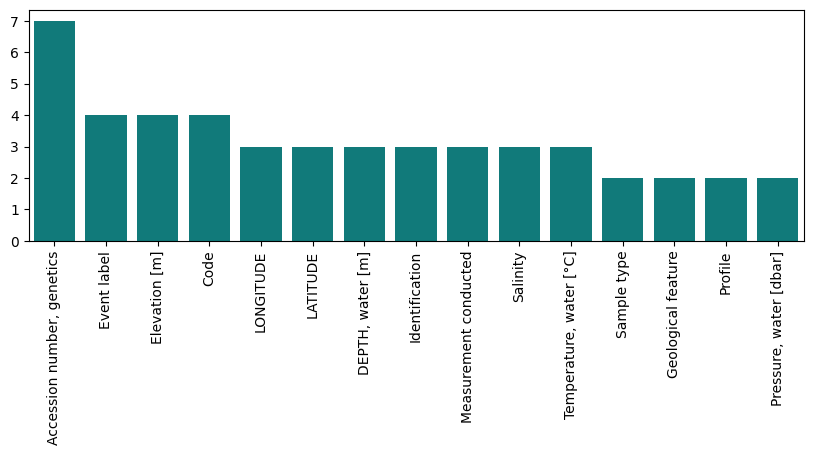

In [1192]:
# Calculate the parameter frequency
param_count = params["parameters"].value_counts()
print(param_count.head(10))
# Plot the parameter frequency
plt.figure(figsize=(10,3))
count_plot = sns.barplot(x = param_count.index[:15], y = param_count.values[:15], color="darkcyan")
count_plot = count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90)

### 5.3 Extract and combine parameters from data frames

#### Function to extract specific parameter(s) from dataframes
**!!! Key benefit of harmonised parameters in a well curated data repository**

In [1193]:
# Function to find and extract desired parameters across all dataframes
def get_param_data(data_dict, params):
    """Function to find and extract desired parameters across all dataframes

    Args:
        params (list): List of parameters to be extracted

    Returns:
        pandas.core.frame.DataFrame: Data frame containing data for all parameters
    """

    # Define empty dictionary to temporarily store extracted data
    extracted_data = {}
    # Loop over all dataframe, look for and extract parameters
    for key, df in data_dict.items():
        # Find parameters that exists in the dataset
        found_params = list(set(params).intersection(set(df.columns)))
        if found_params:
            print(f'Found the parameters {found_params} in dataset {key}')
            # Copy found parameters to new dataframe
            df_sub = df[found_params]
            # Insert PANGAEA dataset ID
            df_sub.insert(0, "Pangaea_dataset_id", key)
            # Store extracted data in dictionary
            extracted_data[key] = df_sub

    # Join all dataframe in dictionary
    extracted_data = pd.concat(extracted_data, ignore_index = True)
    return extracted_data

#### Extract and save specific parameters from dataframes

In [1194]:
# Enter all parameters to be extracted
extracted_data = get_param_data(data_dict, ["LATITUDE", "LONGITUDE", "Date/Time", "DEPTH, water [m]", "Salinity"])
# Save extracted data parameters
extracted_data.to_csv(os.path.join(data_folder, f'Extracted_data.csv'), index=False)
extracted_data

Found the parameters ['Date/Time', 'LONGITUDE', 'LATITUDE', 'Salinity'] in dataset 923035
Found the parameters ['LONGITUDE', 'LATITUDE', 'DEPTH, water [m]', 'Salinity'] in dataset 923033
Found the parameters ['DEPTH, water [m]'] in dataset 923271
Found the parameters ['LONGITUDE', 'LATITUDE', 'DEPTH, water [m]', 'Salinity'] in dataset 909246


,Pangaea_dataset_id,Date/Time,LONGITUDE,LATITUDE,Salinity,"DEPTH, water [m]"
0,923035,2016-08-15,-62.606200,44.318200,31.49,NaN
1,923035,2016-08-15,-62.606200,44.318200,31.51,NaN
2,923035,2016-08-15,-62.606200,44.318200,31.54,NaN
3,923035,2016-08-15,-62.606200,44.318200,31.59,NaN
4,923035,2016-08-15,-62.606200,44.318200,31.61,NaN
...,...,...,...,...,...,...
64385,909246,NaT,-58.551267,64.891000,34.70,561.0
64386,909246,NaT,-63.560678,61.147942,34.82,563.0
64387,909246,NaT,-60.221100,63.098560,34.90,916.0
64388,909246,NaT,-59.158160,62.655480,34.91,1036.0


# 6. Download linked genetic data

## 6.1 Download PANGAEA dataset with genetic accession numbers
Dataset: https://doi.pangaea.de/10.1594/PANGAEA.937551

In [1195]:
# Download dataset from PANGAEA
ds = PanDataSet(937551)
get_long_parameters(ds)
df = ds.data.head(4)
df.head(2)

,Event label,Area/locality,Sample ID,Treatment: pH,Treatment: temperature [°C],Treatment,Treatment: time after [h],Hydrogen evolution activity [nmol/min/mg],"Hydrogen evolution activity, standard deviation [±]",Hydrogen evolution activity [%],"Hydrogen evolution activity, standard deviation [±]","Accession number, genetics",Sample method,Comment,Latitude [deg],Longitude [deg],Elevation [m],Date/Time
0,M78/2_324,Lilliput hydrothermal field,Lilli33G1,NaN,NaN,NaN,NaN,153.22,8.65,NaN,NaN,insdc:MG456606,Diffuse hydrothermal fluids were collected fro...,NaN,-9.543833,-13.212833,-1519.0,2009-04-30 11:50:00
1,M78/2_314,Nibelungen hydrothermal field,Nib22E5,NaN,NaN,NaN,NaN,13.12,1.37,NaN,NaN,insdc:MG456605,Hydrothermal fluids were collected from Dragon...,NaN,-8.297167,-13.508833,-2886.0,2009-04-27 10:01:00


## 6.2. Download Genebank records

In [1196]:
# Extract NCBI accession number from dataset
df.loc[:,"Accession number, genetics"] = [x.split(":")[1] for x in df.loc[:,"Accession number, genetics"]]
# Fetch gene records from NCBI
records = []
for acc_id in df["Accession number, genetics"]:
    print(acc_id)
    handle = Entrez.efetch(db="nucleotide", rettype="fasta", retmode="text",
                          id=acc_id)
    records.append(SeqIO.read(handle, 'fasta'))

C:\Users\marum2022\AppData\Local\Temp\ipykernel_22364\217850740.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MG456606
MG456605
MG456603
MG456604


## 6.3 Add genetic records to PANGAEA data frame

In [1197]:
# Add gene description
df.loc[:, "Gene"] = [record.description for record in records]
# Add genetic sequence
df.loc[:, "Sequence"] = [record.seq for record in records]
df.head(2)

C:\Users\marum2022\AppData\Local\Temp\ipykernel_22364\3909503772.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\marum2022\AppData\Local\Temp\ipykernel_22364\3909503772.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Event label,Area/locality,Sample ID,Treatment: pH,Treatment: temperature [°C],Treatment,Treatment: time after [h],Hydrogen evolution activity [nmol/min/mg],"Hydrogen evolution activity, standard deviation [±]",Hydrogen evolution activity [%],"Hydrogen evolution activity, standard deviation [±]","Accession number, genetics",Sample method,Comment,Latitude [deg],Longitude [deg],Elevation [m],Date/Time,Gene,Sequence
0,M78/2_324,Lilliput hydrothermal field,Lilli33G1,NaN,NaN,NaN,NaN,153.22,8.65,NaN,NaN,MG456606,Diffuse hydrothermal fluids were collected fro...,NaN,-9.543833,-13.212833,-1519.0,2009-04-30 11:50:00,MG456606.1 Uncultured bacterium clone fosmid p...,"(T, C, T, A, G, A, G, G, A, T, C, C, C, A, C, ..."
1,M78/2_314,Nibelungen hydrothermal field,Nib22E5,NaN,NaN,NaN,NaN,13.12,1.37,NaN,NaN,MG456605,Hydrothermal fluids were collected from Dragon...,NaN,-8.297167,-13.508833,-2886.0,2009-04-27 10:01:00,MG456605.1 Uncultured bacterium clone fosmid p...,"(G, T, G, G, T, A, C, A, A, T, G, C, A, C, G, ..."


# 7. Download binary files

## 7.1 Download PANGAEA dataset with image data
Dataset: https://doi.pangaea.de/10.1594/PANGAEA.943250

In [1198]:
# Download dataset from PANGAEA
pan_id = 943250
ds = PanDataSet(pan_id)
get_long_parameters(ds)
df = ds.data.iloc[22:25,:]
df.head(2)

,Image,DATE/TIME,LONGITUDE,LATITUDE,"DEPTH, water [m]",Event,Elevation [m]
22,HOTKEY_2019_10_01_at_23_15_06_CP4A6694.JPG,2019-10-01 23:15:06,-5.947374,82.894183,4023.7,HACON19-24-OFOBS-03,-3930.0
23,HOTKEY_2019_10_01_at_23_19_28_CP4A6708.JPG,2019-10-01 23:19:28,-5.946048,82.894154,4021.7,HACON19-24-OFOBS-03,-3930.0


## 7.2 Download images

In [1199]:
# Create file urls
df["image_url"] = [f'https://download.pangaea.de/dataset/{pan_id}/files/{img}' for img in df['Image']]
# Download images
for i, file_url in enumerate(df["image_url"]):
    urlretrieve(file_url, os.path.join(data_folder, df["Image"].iloc[i]))
    print(f'{file_url} downloaded')

C:\Users\marum2022\AppData\Local\Temp\ipykernel_22364\455756297.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



https://download.pangaea.de/dataset/943250/files/HOTKEY_2019_10_01_at_23_15_06_CP4A6694.JPG downloaded
https://download.pangaea.de/dataset/943250/files/HOTKEY_2019_10_01_at_23_19_28_CP4A6708.JPG downloaded
https://download.pangaea.de/dataset/943250/files/HOTKEY_2019_10_01_at_23_20_11_CP4A6711.JPG downloaded
